# SARK-110 Basic example

Simple Jupyter notebook example for interacting with the SARK-110 Antenna Analyzer.

Please ensure that the analyzer is connected to the computer using the USB cable and in Computer Control mode.

In [1]:
from sark110 import *
import math
import matplotlib.pyplot as plt

Enter frequency limits:

In [2]:
fr_start = 12000000   # Frequency start in Hz
fr_stop =  15000000   # Frequency stop in Hz
points = 100          # Number of points

## Utility functions

In [3]:
def z2vswr(r, x):
    gamma = math.sqrt((r - 50) ** 2 + x ** 2) / math.sqrt((r + 50) ** 2 + x ** 2)
    if gamma > 0.980197824:
        return 99.999
    swr = (1 + gamma) / (1 - gamma)
    return swr

def z2mag(r, x):
    return (math.sqrt(r ** 2 + x ** 2))

## Connect to the device

In [4]:
sark110 = Sark110()
sark110.open()
if sark110.connect() < 0:
    print("sark-110 not connected")
else:
    sark110.buzzer()
    print("sark-110 connected")
    print(sark110.fw_protocol, sark110.fw_version)

sark-110 connected
2566 1.5


## Basic chart

In [5]:
y = []
x = []
rs = [0]
xs = [0]
for freq in range(fr_start, fr_stop, int((fr_stop-fr_start)/points)):  # setup loop over number of points
    sark110.measure(freq, rs, xs)
    print (freq, rs, xs)
    x.append(freq)
    y.append(z2vswr(rs[0][0], xs[0][0]))

12000000 [(8.188714027404785,)] [(-100.29105377197266,)]
12030000 [(8.364320755004883,)] [(-99.20379638671875,)]
12060000 [(8.640634536743164,)] [(-98.09463500976562,)]
12090000 [(8.856894493103027,)] [(-96.95672607421875,)]
12120000 [(9.104934692382812,)] [(-95.75904846191406,)]
12150000 [(9.358857154846191,)] [(-94.58039855957031,)]
12180000 [(9.602808952331543,)] [(-93.44207000732422,)]
12210000 [(9.935267448425293,)] [(-92.18428039550781,)]
12240000 [(10.209067344665527,)] [(-90.98169708251953,)]
12270000 [(10.512680053710938,)] [(-89.69849395751953,)]
12300000 [(10.775232315063477,)] [(-88.431884765625,)]
12330000 [(11.085935592651367,)] [(-87.17431640625,)]
12360000 [(11.468591690063477,)] [(-85.8547592163086,)]
12390000 [(11.824322700500488,)] [(-84.52561950683594,)]
12420000 [(12.160313606262207,)] [(-83.1727066040039,)]
12450000 [(12.55543041229248,)] [(-81.78555297851562,)]
12480000 [(12.912196159362793,)] [(-80.40274047851562,)]
12510000 [(13.370828628540039,)] [(-78.9592056

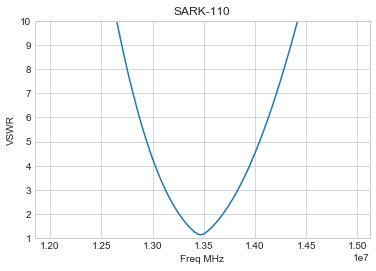

In [6]:
plt.style.use('seaborn-whitegrid')
plt.plot(x, y)
plt.title('SARK-110')
plt.xlabel('Freq MHz')
plt.ylabel('VSWR')
plt.ylim(1., 10.)
plt.show()

## Dual axis chart

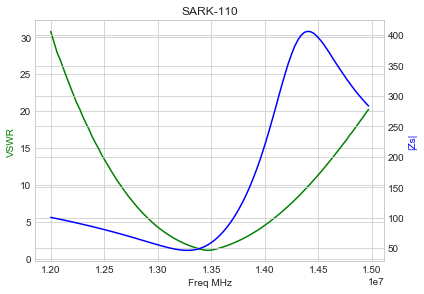

In [7]:
y1 = []
y2 = []
x = []
rs = [0]
xs = [0]
for freq in range(fr_start, fr_stop, int((fr_stop-fr_start)/points)):  # setup loop over number of points
    sark110.measure(freq, rs, xs)
    x.append(freq)
    y1.append(z2vswr(rs[0][0], xs[0][0]))
    y2.append(z2mag(rs[0][0], xs[0][0]))

plt.style.use('seaborn-whitegrid')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
ax1.set_xlabel('Freq MHz')
ax1.set_ylabel('VSWR', color='g')
ax2.set_ylabel('|Zs|', color='b')
fig.tight_layout() 
plt.title('SARK-110')

plt.show()

In [8]:
sark110.close()